In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
electricity_ts=pd.read_csv('Electric_Production.csv')

In [8]:
electricity_ts.rename(columns={'IPG2211A2N': 'Units'}, inplace=True)

In [18]:
electricity_ts.index=pd.to_datetime(electricity_ts.DATE)

In [20]:
electricity_ts.drop('DATE',axis=1,inplace=True)

In [21]:
electricity_ts.head()

,Units
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# Moving Average

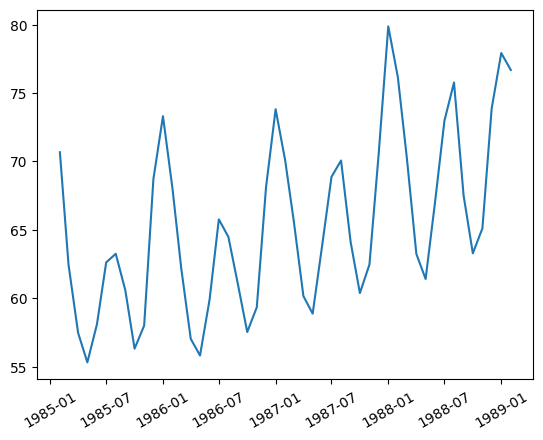

In [24]:
plt.plot(electricity_ts[1:50]['Units'])
plt.xticks(rotation=30)
plt.show()

In [28]:
#Rolling average transform
rolling_series=electricity_ts[1:50].rolling(window=10)
rollingmean=rolling_series.mean()
#increasing the windo smoothning will increase

<Axes: xlabel='DATE'>

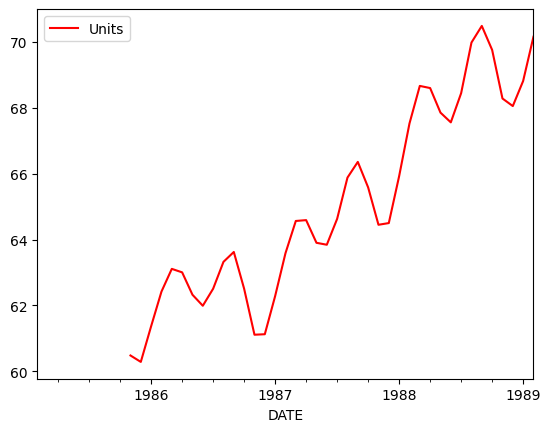

In [29]:
rollingmean.plot(color='red')

# Simple Exponential Smoothing

In [32]:
data=electricity_ts[1:50]

fit1= SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

fit2= SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

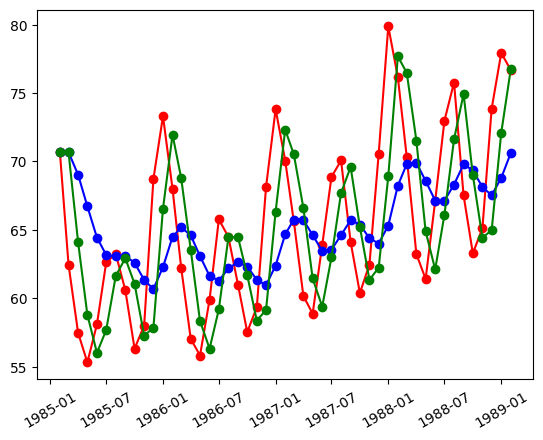

In [34]:
plt.plot(data,color='red',marker='o')
plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='green')
plt.xticks(rotation=30)
plt.show()

# Holt method for exponential smoothing

In [35]:
fit1=Holt(data).fit()  #linear trend
fit2= Holt(data,exponential=True).fit() 

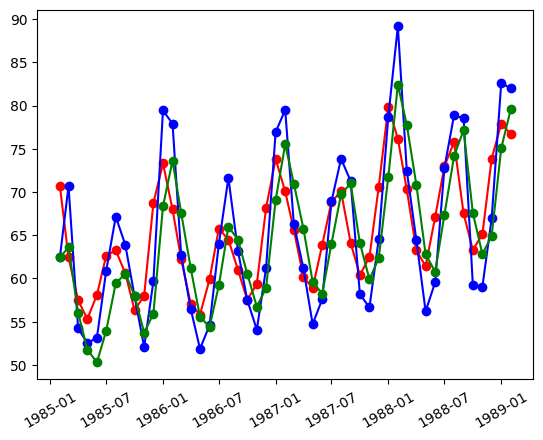

In [36]:
plt.plot(data,color='red',marker='o')
plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='green')
plt.xticks(rotation=30)
plt.show()